In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Flatten, Dense, Input, concatenate
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

from tensorflow.keras.optimizers import SGD, Adam
import matplotlib .pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from datetime import datetime
import cv2
import zipfile
import shutil
import os
import glob
import math

from tqdm import tqdm_notebook
from tensorflow.keras.applications import Xception, ResNet50
from tensorflow.keras.applications import InceptionV3, MobileNet

In [2]:
import matplotlib.font_manager as fm # 폰트연결 시켜주는 모듈
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family = font_name)

# 마이너스 사인 해결
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 워닝소리 미전시
import warnings
warnings.filterwarnings("ignore") 

# 1. 당도 Data 분석

In [3]:
# 비교할 origin Data 준비
tom_origin_scale = pd.read_csv("tomato_farm_set/tom_ori_scaler.csv", encoding = "utf-8", index_col = 0)
tom_origin_scale

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
0,NaN,2.130051,0.036527,-1.059642,1.055893,-1.237209,NaN,NaN,NaN,NaN,205,4.1,4.0
1,0.438653,NaN,1.977642,-1.461602,NaN,0.721711,0.331941,-0.476138,0.05024,-0.181888,210,4.7,4.0
2,0.438653,NaN,1.977642,-1.461602,NaN,0.721711,0.035149,-0.476138,0.05024,-0.181888,205,4.7,4.0
3,-0.988807,1.947248,NaN,-1.075642,0.448968,NaN,-0.345734,NaN,NaN,NaN,206,4.7,4.5
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,NaN,-0.684982,-0.435427,0.757622,NaN,NaN,NaN,1.422973,NaN,NaN,148,4.5,4.0
1192,NaN,-0.830235,-0.314654,0.903914,NaN,NaN,NaN,0.901538,NaN,NaN,142,4.6,4.0
1193,NaN,-0.892603,-0.306945,0.980852,NaN,NaN,NaN,0.530360,NaN,NaN,151,4.5,3.5
1194,NaN,-0.916812,-0.227287,0.894161,NaN,NaN,NaN,0.191950,NaN,NaN,145,4.3,3.5


In [4]:
tom_mul_sugar_98 = pd.read_csv("tomato_farm_set/tom_mul_sugar_scale_seed_98.csv", encoding = "utf-8", index_col = 0)
tom_mul_sugar_98

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,1.796042,0.772066,-0.051379,-1.762873,1.990248,4.333265,-0.004977,-1.611603,1.255701,0.807014,-0.481749,-1.068529,205.0,4.1,4.0
1,0.598749,-0.781190,1.924176,-1.541360,2.009343,1.279843,-1.014037,-0.465748,-0.484560,-1.026820,-1.628147,-2.492791,210.0,4.7,4.0
2,-0.195377,-0.144285,0.330645,-0.846982,1.510330,-0.875716,-0.006092,-0.222136,-0.989814,-0.983562,-0.019712,-0.828641,205.0,4.7,4.0
3,0.598749,-0.642343,1.924176,-1.541360,1.548437,1.279843,-2.984171,-0.465748,-0.484560,-1.026820,-1.433301,-2.492791,206.0,4.7,4.5
4,0.111670,-0.118601,-0.895252,-0.281491,0.031088,-0.093350,2.290866,0.406079,0.199642,0.410731,-0.269715,0.602760,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,-1.573507,0.037312,-0.418014,0.734402,-0.208301,-0.700271,-0.056317,1.615003,0.646120,1.641561,1.789115,0.801899,148.0,4.5,4.0
1192,-1.710393,-0.085327,-0.300789,0.884420,-0.154628,-0.608435,-0.060640,1.043696,0.243259,1.323546,1.753388,0.787938,142.0,4.6,4.0
1193,-1.763313,-0.137986,-0.293307,0.963318,-0.131129,-0.376922,-0.054003,0.637017,0.077712,1.227790,1.730243,0.830117,151.0,4.5,3.5
1194,-1.795065,-0.158425,-0.215988,0.874419,-0.102918,-0.440923,-0.058372,0.266240,-0.156563,0.902682,1.735594,0.704481,145.0,4.3,3.5


## 1) 시각화

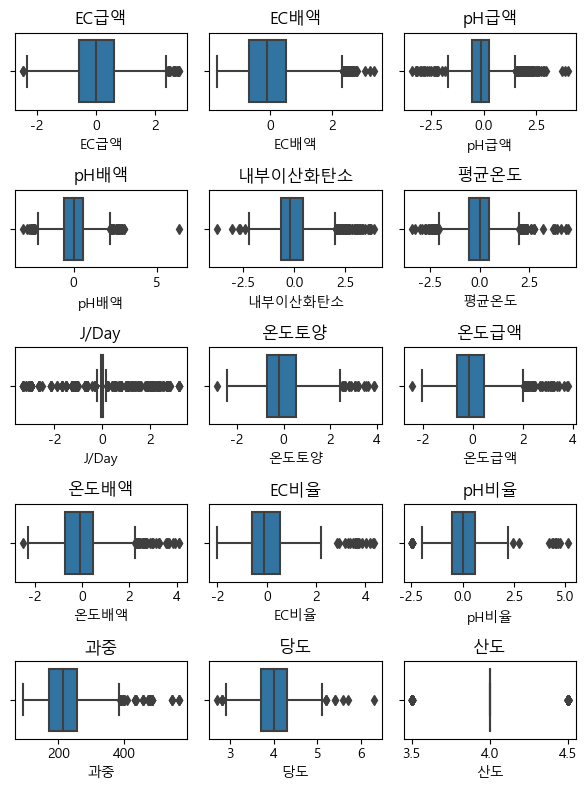

In [5]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_mul_sugar_98.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_mul_sugar_98[tom_mul_sugar_98.columns[i]])
    plt.title(tom_mul_sugar_98.columns[i])
plt.tight_layout()

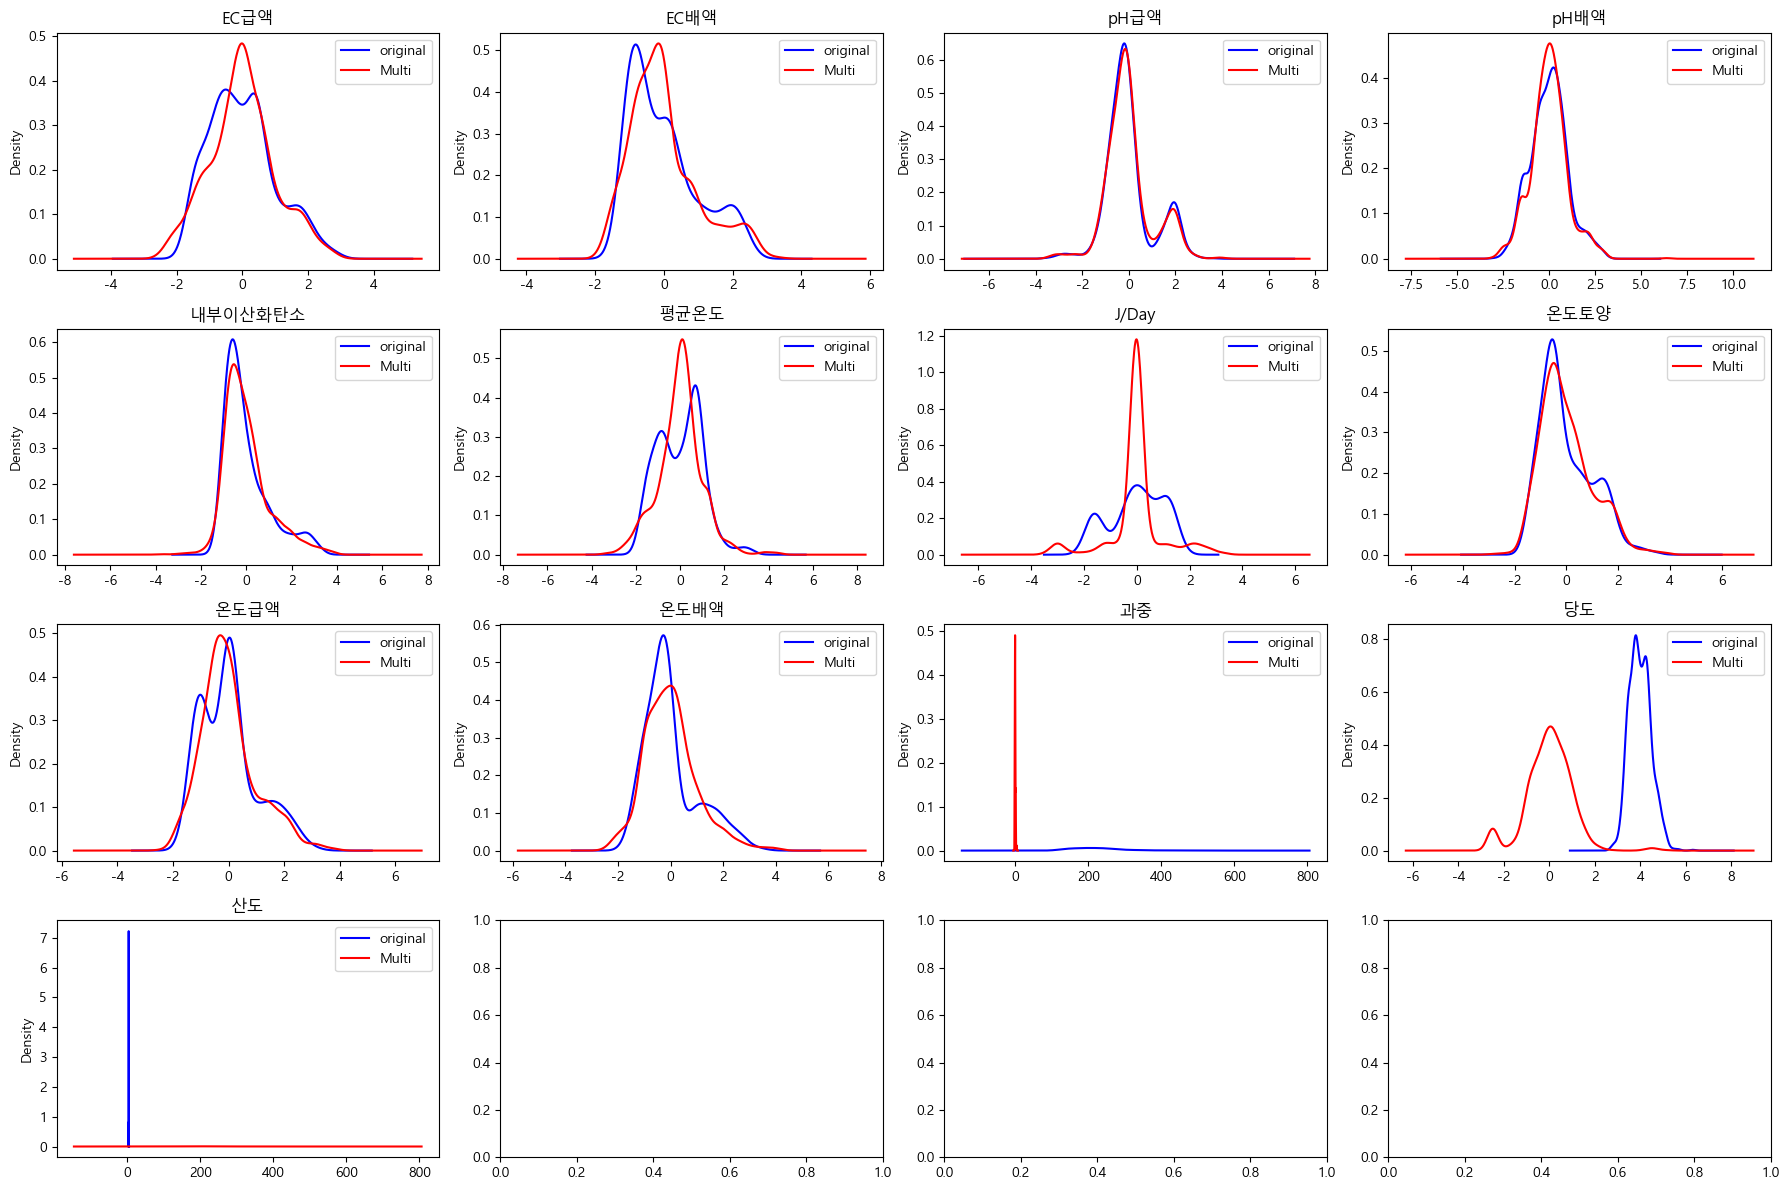

In [6]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2) in enumerate(zip(tom_origin_scale.columns, tom_mul_sugar_98.columns)):
    ax = axis[i//4, i%4]
    tom_origin_scale[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom_mul_sugar_98[column2].plot(kind = "kde", ax = ax, color = "red", label = "Multi")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

## 2) model 구성 및 학습

In [7]:
# sugar
X = tom_mul_sugar_98[tom_mul_sugar_98.columns[:-3]]
y_s = tom_mul_sugar_98[tom_mul_sugar_98.columns[-2]]


# 데이터 분리
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=98,
                                                       test_size=0.2)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}


# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_s)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")


<당도>
파라미터 :  {'alpha': 0.01}
훈련 점수 :  0.9675564762749337
테스트 점수:  0.953183980958138
rmse :  0.1031485764884748
----------------------------------------------------


In [8]:
model_sugar= Ridge(alpha = 0.01)
model_sugar.fit(X_train, y_train_s)

Ridge(alpha=0.01)

In [9]:
pred = model_sugar.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

In [10]:
print(model_sugar.score(X_train, y_train_s))
print(model_sugar.score(X_test, y_test_s))
print(rmse)

0.9692479891297405
0.953183980958138
0.1031485764884748


In [11]:
# 모델 저장
import joblib
joblib.dump(model_sugar, 'tomato_farm_set/ridge_model_sugar_98.pkl')

['tomato_farm_set/ridge_model_sugar_98.pkl']

## 3) 검증

In [12]:
# 애초에 5번 농장의 식별이 안돼는 파괴데이터를 랜덤하게 엮어놓았기에 
# 현재 보유한 자료료는 검증 불가 

# 2. 과중 Data 분석

In [13]:
# 비교할 origin Data 준비
tom_origin = pd.read_csv("tomato_farm_set/tom_origin.csv", encoding = "utf-8", index_col = 0)
tom_origin

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
1,NaN,4.849270,5.698500,5.892500,495.500000,16.565000,NaN,NaN,NaN,NaN,205,4.1,4.0
2,2.957932,NaN,6.076204,5.830677,NaN,22.491605,1073.0,16.894489,17.831317,17.304435,210,4.7,4.0
3,2.957932,NaN,6.076204,5.830677,NaN,22.491605,1013.0,16.894489,17.831317,17.304435,205,4.7,4.0
4,2.651508,4.775017,NaN,5.890039,468.640523,NaN,936.0,NaN,NaN,NaN,206,4.7,4.5
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,NaN,3.705833,5.606667,6.172000,NaN,NaN,NaN,20.227000,NaN,NaN,148,4.5,4.0
93,NaN,3.646833,5.630167,6.194500,NaN,NaN,NaN,19.312000,NaN,NaN,142,4.6,4.0
94,NaN,3.621500,5.631667,6.206333,NaN,NaN,NaN,18.660667,NaN,NaN,151,4.5,3.5
95,NaN,3.611667,5.647167,6.193000,NaN,NaN,NaN,18.066833,NaN,NaN,145,4.3,3.5


In [14]:
tom_mul_weight_98 = pd.read_csv("tomato_farm_set/tom_mul_weight_seed_98_1.csv", encoding = "utf-8", index_col = 0)
tom_mul_weight_98

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,3.036998,4.862508,5.724400,5.917600,403.000000,17.106000,1199.000000,17.820476,15.924709,12.404880,1.601091,1.033750,205.0,4.1,4.0
1,2.805554,3.881624,5.674707,6.057672,443.995647,19.850729,1023.506626,17.862115,17.869125,18.139669,1.383550,1.067486,210.0,4.7,4.0
2,2.761088,4.205791,5.777273,5.955974,489.144330,17.203299,1157.000000,17.596866,17.483825,17.591480,1.523237,1.030932,205.0,4.7,4.0
3,2.804627,4.103064,5.600740,5.996913,436.850907,19.249896,1297.000000,18.213375,17.890497,17.953898,1.462962,1.070736,206.0,4.7,4.5
4,2.833402,4.145968,5.605600,6.002124,438.179789,19.085905,1297.000000,18.150927,17.786057,17.821378,1.463248,1.070737,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2.889224,3.705833,5.606667,6.172000,419.068367,19.747827,1013.894062,20.227000,18.484679,18.980200,1.282640,1.100832,148.0,4.5,4.0
1192,2.808535,3.646833,5.630167,6.194500,417.042207,19.634694,1012.854103,19.312000,18.294317,18.997413,1.298482,1.100234,142.0,4.6,4.0
1193,2.771326,3.621500,5.631667,6.206333,417.508486,19.714082,1014.977054,18.660667,18.135969,19.029228,1.306775,1.102042,151.0,4.5,3.5
1194,2.747885,3.611667,5.647167,6.193000,417.640224,19.580482,1013.444418,18.066833,17.944286,18.852073,1.314344,1.096656,145.0,4.3,3.5


## 1) 시각화

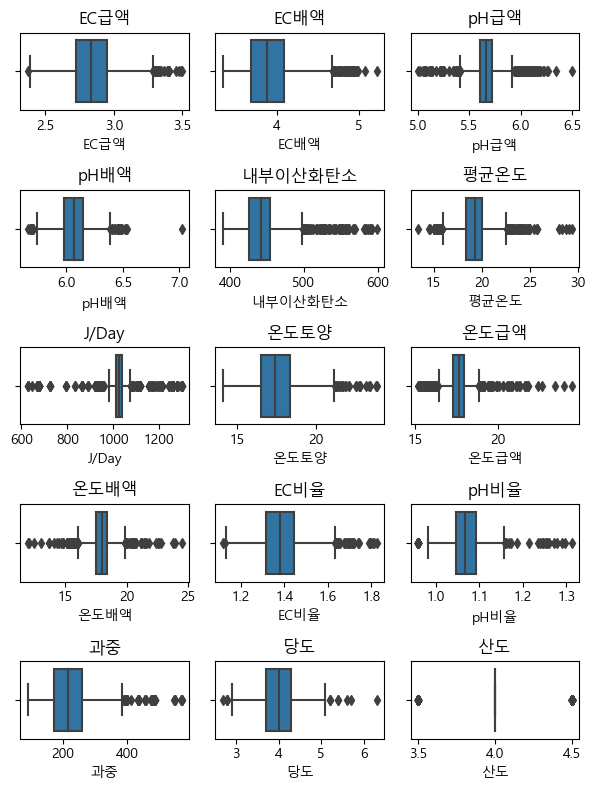

In [15]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_mul_weight_98.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_mul_weight_98[tom_mul_weight_98.columns[i]])
    plt.title(tom_mul_weight_98.columns[i])
plt.tight_layout()

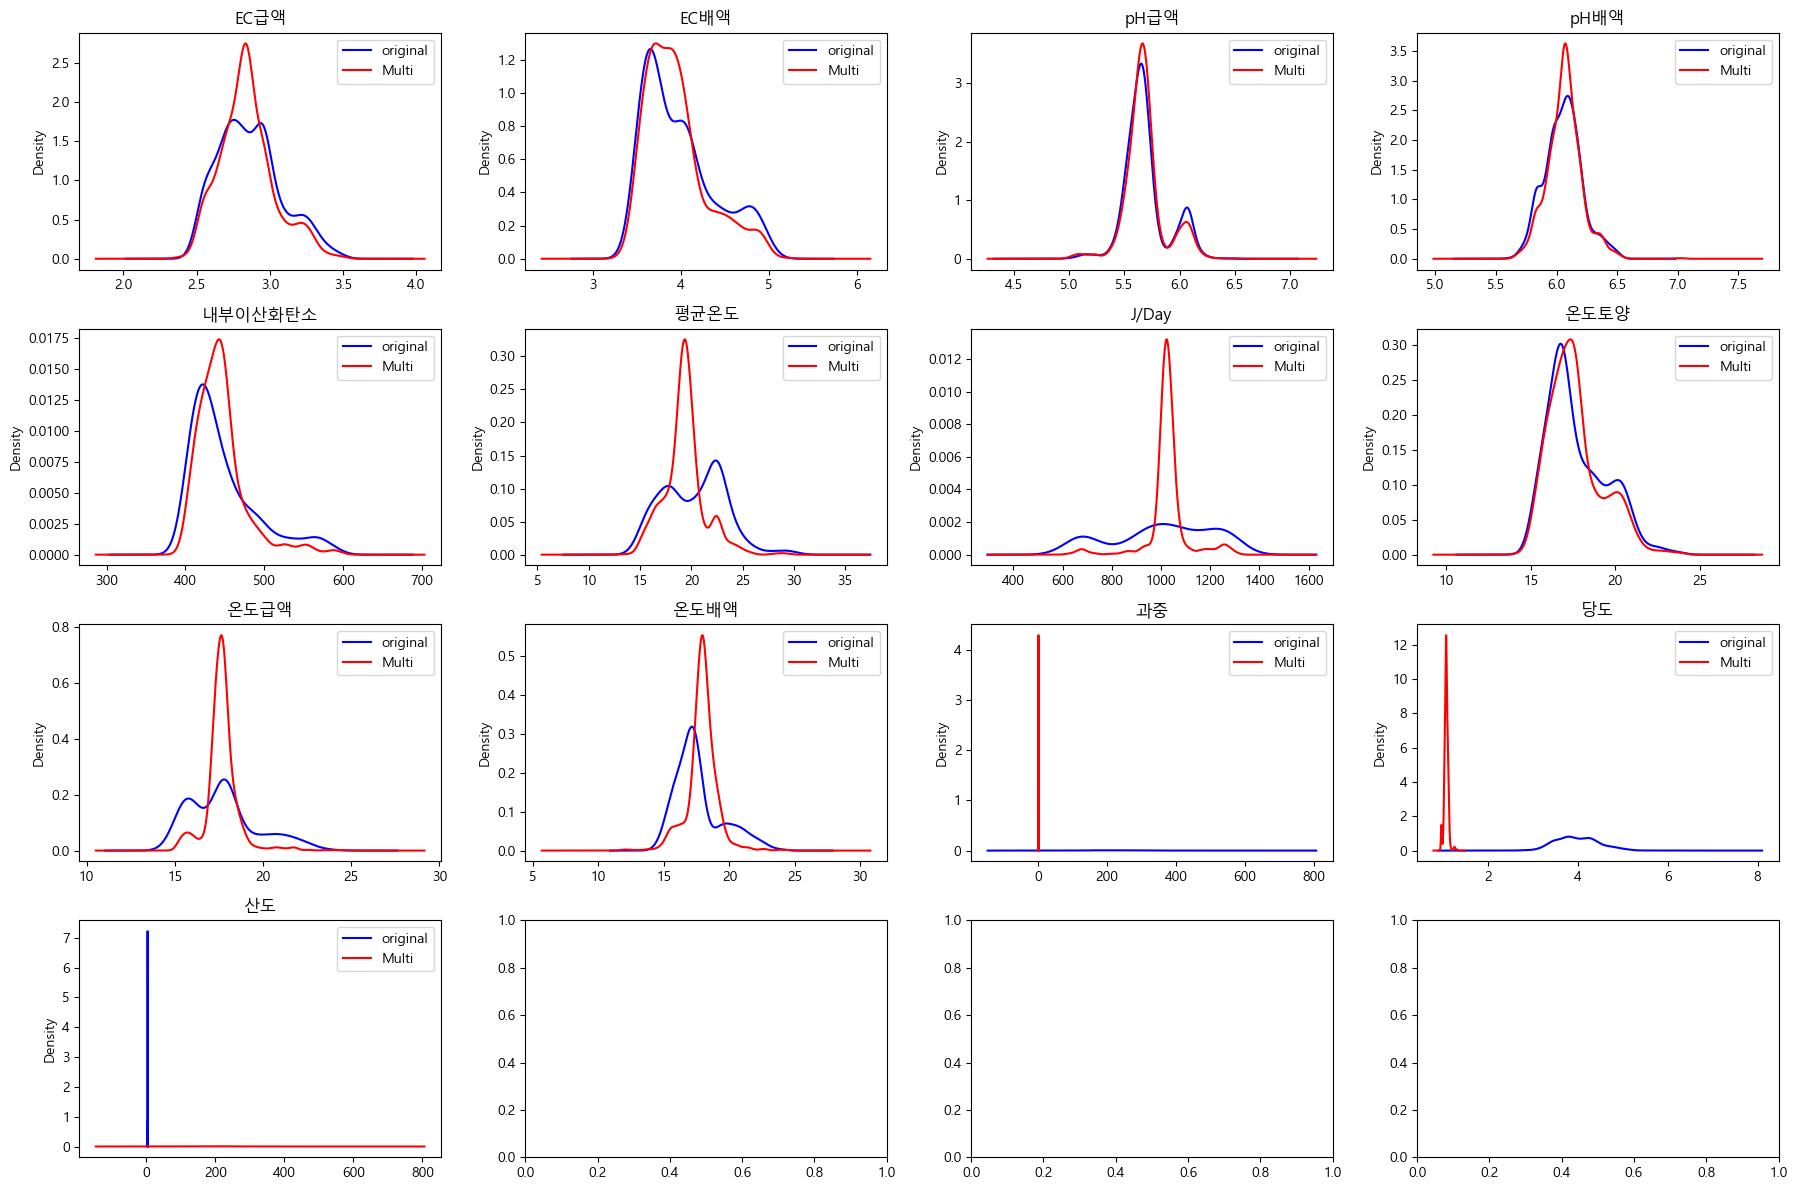

In [16]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2) in enumerate(zip(tom_origin.columns, tom_mul_weight_98.columns)):
    ax = axis[i//4, i%4]
    tom_origin[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom_mul_weight_98[column2].plot(kind = "kde", ax = ax, color = "red", label = "Multi")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

## 2) model 구성 및 학습

In [17]:
# weight
X = tom_mul_weight_98[tom_mul_weight_98.columns[:-3]]
y_s = tom_mul_weight_98[tom_mul_weight_98.columns[-3]]


# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_s, 
                                                        random_state=98,
                                                       test_size=0.2)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}


# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_w)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")


<과중>
파라미터 :  {'alpha': 0.0001}
훈련 점수 :  0.9951702242843163
테스트 점수:  0.9958381324654477
rmse :  4.892308237100221
----------------------------------------------------


In [18]:
model_weight = Ridge(alpha = 0.001)
model_weight.fit(X_train, y_train_w)

Ridge(alpha=0.001)

In [19]:
pred = model_weight.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

In [20]:
print(model_weight.score(X_train, y_train_w))
print(model_weight.score(X_test, y_test_w))
print(rmse)

0.995468217364264
0.9958135244487859
4.9067503796320135


In [21]:
# 모델 저장
import joblib
joblib.dump(model_weight, 'tomato_farm_set/ridge_model_weight_98.pkl')

['tomato_farm_set/ridge_model_weight_98.pkl']

## 3) 검증

In [22]:
# 애초에 5번 농장의 식별이 안돼는 파괴데이터를 랜덤하게 엮어놓았기에 
# 현재 보유한 자료료는 검증 불가 

# 3. 산도 data 분석

In [23]:
# 비교할 origin Data 준비
tom_origin = pd.read_csv("tomato_farm_set/tom_origin.csv", encoding = "utf-8", index_col = 0)
tom_origin

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
1,NaN,4.849270,5.698500,5.892500,495.500000,16.565000,NaN,NaN,NaN,NaN,205,4.1,4.0
2,2.957932,NaN,6.076204,5.830677,NaN,22.491605,1073.0,16.894489,17.831317,17.304435,210,4.7,4.0
3,2.957932,NaN,6.076204,5.830677,NaN,22.491605,1013.0,16.894489,17.831317,17.304435,205,4.7,4.0
4,2.651508,4.775017,NaN,5.890039,468.640523,NaN,936.0,NaN,NaN,NaN,206,4.7,4.5
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,NaN,3.705833,5.606667,6.172000,NaN,NaN,NaN,20.227000,NaN,NaN,148,4.5,4.0
93,NaN,3.646833,5.630167,6.194500,NaN,NaN,NaN,19.312000,NaN,NaN,142,4.6,4.0
94,NaN,3.621500,5.631667,6.206333,NaN,NaN,NaN,18.660667,NaN,NaN,151,4.5,3.5
95,NaN,3.611667,5.647167,6.193000,NaN,NaN,NaN,18.066833,NaN,NaN,145,4.3,3.5


In [24]:
tom_mul_ph_100 = pd.read_csv("tomato_farm_set/tom_mul_ph_seed_100.csv", encoding = "utf-8", index_col = 0)
tom_mul_ph_100

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.898393,4.896149,5.733000,5.850000,565.000000,16.662725,1199.000000,16.793713,17.136054,16.928441,1.689263,1.020408,205.0,4.1,4.0
1,2.957932,3.550893,6.076204,5.830677,460.352565,22.491605,678.447458,16.894489,17.831317,17.304435,1.200465,0.959592,210.0,4.7,4.0
2,2.957932,3.544252,6.076204,5.830677,459.556993,22.491605,678.447458,16.894489,17.831317,17.304435,1.198219,0.959592,205.0,4.7,4.0
3,2.850802,3.927237,5.668659,6.054313,443.126160,20.163795,997.312992,18.056189,17.736305,17.653687,1.377590,1.068033,206.0,4.7,4.5
4,2.956966,4.840920,5.678000,5.881000,543.000000,17.255000,956.625930,16.883558,17.406071,18.167521,1.637124,1.035752,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2.909954,3.705833,5.606667,6.172000,416.603430,20.708396,993.647426,20.227000,18.097557,17.413444,1.273502,1.100832,148.0,4.5,4.0
1192,2.832998,3.646833,5.630167,6.194500,414.705154,20.723260,992.869117,19.312000,17.916304,17.497736,1.287270,1.100234,142.0,4.6,4.0
1193,2.788755,3.621500,5.631667,6.206333,418.162893,21.024813,993.716316,18.660667,17.748393,17.562599,1.298608,1.102042,151.0,4.5,3.5
1194,2.757550,3.611667,5.647167,6.193000,418.828868,20.905488,991.787999,18.066833,17.625455,17.627842,1.309738,1.096656,145.0,4.3,3.5


In [25]:
tom_mul_ph_scale_100 = pd.read_csv("tomato_farm_set/tom_mul_ph_scale_seed_100.csv", encoding = "utf-8", index_col = 0)
tom_mul_ph_scale_100

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,0.184463,2.525671,0.245742,-1.400984,3.318269,-1.672038,2.147264,-0.568486,-0.469257,-0.706053,2.697994,-1.042141,205.0,4.1,4.0
1,0.501168,-1.122045,2.150333,-1.532113,0.326188,1.215186,-3.454248,-0.503535,0.273888,-0.335145,-1.651437,-2.440159,210.0,4.7,4.0
2,0.501168,-1.140054,2.150333,-1.532113,0.303441,1.215186,-3.454248,-0.503535,0.273888,-0.335145,-1.671417,-2.440159,205.0,4.7,4.0
3,-0.068688,-0.101573,-0.111316,-0.014451,-0.166350,0.062150,-0.023031,0.245183,0.172332,0.009381,-0.075336,0.052634,206.0,4.7,4.5
4,0.496024,2.375916,-0.059477,-1.190608,2.689245,-1.378666,-0.460852,-0.510580,-0.180645,0.516264,2.234052,-0.689422,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,0.245956,-0.701918,-0.455337,0.784210,-0.924689,0.331908,-0.062475,1.644274,0.558463,-0.227612,-1.001531,0.806620,148.0,4.5,4.0
1192,-0.163391,-0.861899,-0.324925,0.936902,-0.978964,0.339271,-0.070850,1.054555,0.364728,-0.144460,-0.879026,0.792863,142.0,4.6,4.0
1193,-0.398734,-0.930592,-0.316601,1.017207,-0.880100,0.488639,-0.061733,0.634769,0.185253,-0.080475,-0.778134,0.834428,151.0,4.5,3.5
1194,-0.564723,-0.957255,-0.230585,0.926723,-0.861059,0.429534,-0.082483,0.252043,0.053847,-0.016114,-0.679102,0.710619,145.0,4.3,3.5


## 1) 시각화

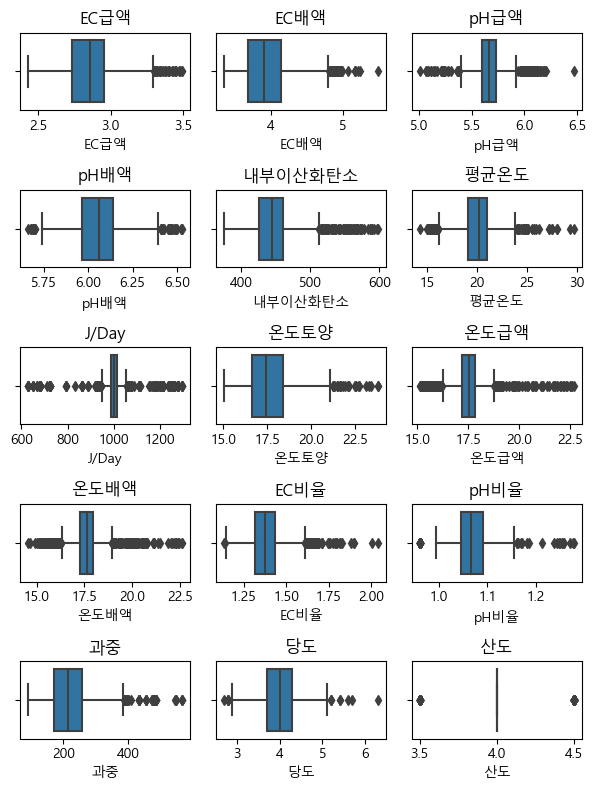

In [26]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_mul_ph_100.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_mul_ph_100[tom_mul_ph_100.columns[i]])
    plt.title(tom_mul_ph_100.columns[i])
plt.tight_layout()

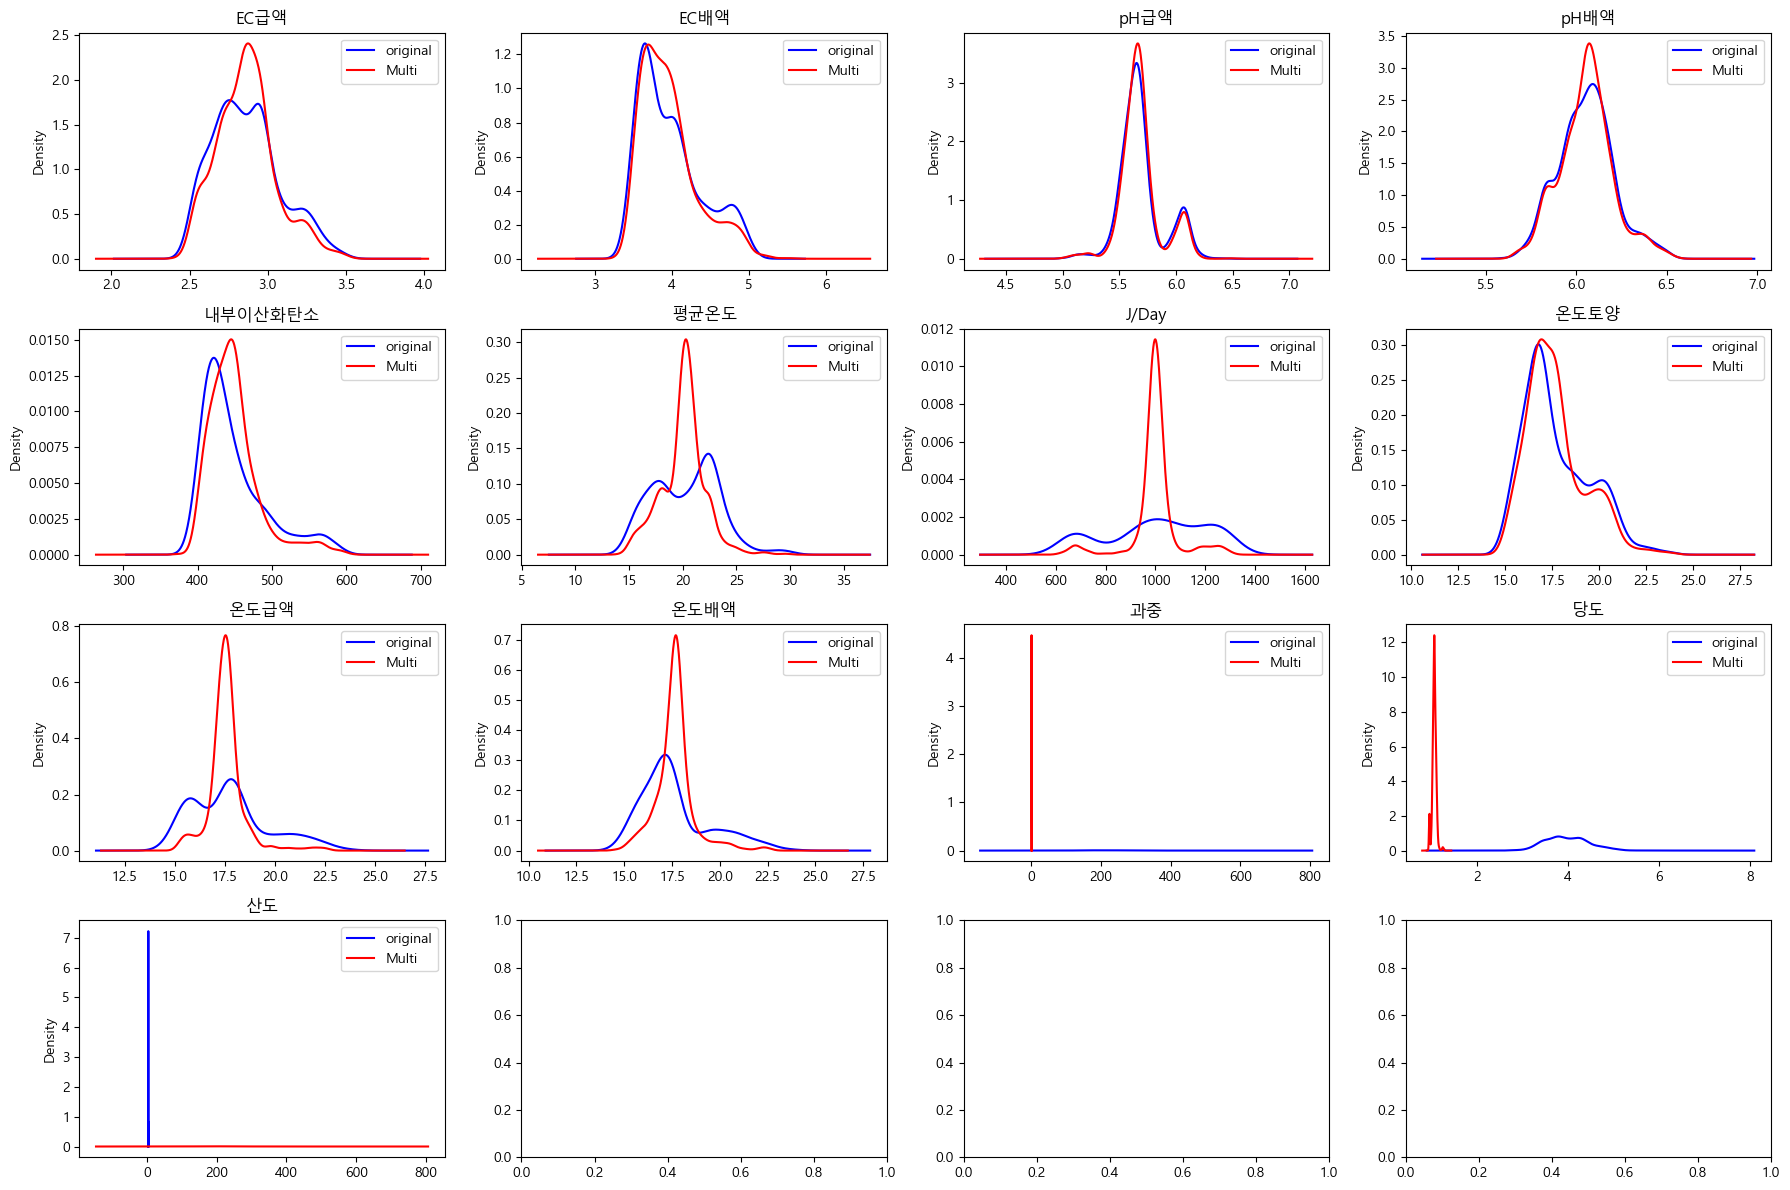

In [27]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2) in enumerate(zip(tom_origin.columns, tom_mul_ph_100.columns)):
    ax = axis[i//4, i%4]
    tom_origin[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom_mul_ph_100[column2].plot(kind = "kde", ax = ax, color = "red", label = "Multi")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

## 2) modell 구성 및 학습

- 산도는 명백히 연속변수이나, 현재 Data상으로 3.5, 4, 4.5 3가지의 범주로 구분되어 있음.
- 딥러닝 분류모델로 구축해보자


In [138]:
tom_mul_ph_scale_100["산도"].value_counts()

4.0    1015
4.5     117
3.5      64
Name: 산도, dtype: int64

In [132]:
# ph
X = tom_mul_ph_scale_100[tom_mul_ph_scale_100.columns[:-3]]
y_p = tom_mul_ph_scale_100[tom_mul_ph_scale_100.columns[-1]]

# one hot encoder
y_one = pd.get_dummies(y_p)
y_one

# 데이터 분리
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_one, 
                                                        random_state=98,
                                                       test_size=0.2)

# 딥러닝 분류모델 생성
model = Sequential()
model.add(Flatten(input_shape = (12,)))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.3))

model.add(Dense(3, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = Adam(0.0001),
             metrics = "accuracy")
model.summary()

result = model.fit(X_train, y_train_p, epochs = 3000, validation_split=0.2)

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_35 (Flatten)        (None, 12)                0         
                                                                 
 dense_152 (Dense)           (None, 64)                832       
                                                                 
 dropout_117 (Dropout)       (None, 64)                0         
                                                                 
 dense_153 (Dense)           (None, 64)                4160      
                                                                 
 dropout_118 (Dropout)       (None, 64)                0         
                                                                 
 dense_154 (Dense)           (None, 128)               8320      
                                                                 
 dropout_119 (Dropout)       (None, 128)             

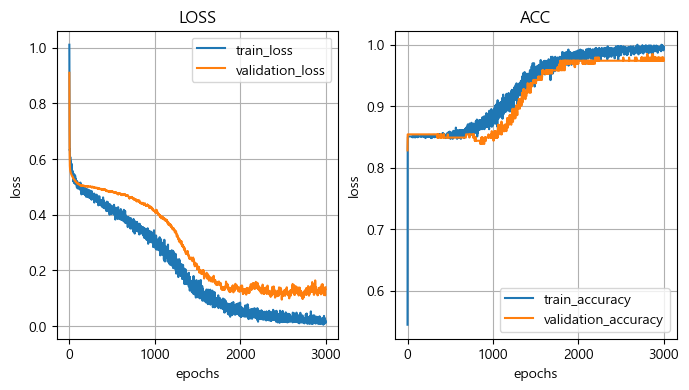

In [133]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)

plt.title("LOSS")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["loss"], label = "train_loss")
plt.plot(result.history["val_loss"], label = "validation_loss")
plt.legend(loc = "best")

plt.subplot(1, 2, 2)

plt.title("ACC")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid()

plt.plot(result.history["accuracy"], label = "train_accuracy")
plt.plot(result.history["val_accuracy"], label = "validation_accuracy")
plt.legend(loc = "best")

In [139]:
print("Evaluate")
model.evaluate(X_test, y_test_p)

Evaluate
8/8 [==============================] - 0s 987us/step - loss: 0.1609 - accuracy: 0.9667


[0.16092276573181152, 0.9666666388511658]

In [135]:
# 모델 저장
import joblib
joblib.dump(model, 'tomato_farm_set/DNN_model_ph.pkl')

['tomato_farm_set/DNN_model_ph.pkl']